# HW08 <font color=red>(제출기한-6월14일자정)</font>
Datascience 모듈의 Table 연습을 위한 문제입니다. 
- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 한 셀에 여러줄의 코드를 사용해도 무방합니다.

제출시 다음 사항에 유의하기 바랍니다.
- 텍스트 셀에 설명되어 있는 각 문항을 잘 읽은 뒤, 코드 셀에 적절한 코드를 작성합니다.
- 작성 후 파일명에 ``학번``을 자신의 학번으로 고친 후 ULMS 해당과제 제출란에 업로드합니다.

In [2]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.random.seed(0)

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


### 다음 데이터를 이용하자.

In [4]:
nba = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/nba_salaries.csv').relabeled("'15-'16 SALARY",'SALARY')
salary = nba.with_column('SALARY', nba.column(3).round(1)).drop('2015-2016 SALARY').where('SALARY', are.above(0))
salary

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.7
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.8
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.7
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.3
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.8
Tim Hardaway Jr.,SG,Atlanta Hawks,1.3


### 문제1
전체 선수들의 연봉 평균을 구하여 ``salary_mean``에 저장하시오. 

In [0]:
### 답안을 작성하시오.
salary_mean = np.mean(salary['SALARY'])

In [12]:
### 지우지 마시오.
salary_mean

5.107487922705314

### 문제2
위 ``nba`` Table에서 100명의 선수들을 sampling하여 ``nba_sample``변수에 저장하시오.

(단, replacement=False)

In [0]:
### 답안을 작성하시오.
nba_sample = nba.sample(100,with_replacement=False)

In [10]:
### 지우지 마시오.
nba_sample

PLAYER,POSITION,TEAM,SALARY
Alan Anderson,SG,Washington Wizards,4
Roy Hibbert,C,Los Angeles Lakers,15.5922
Chris Copeland,SF,Milwaukee Bucks,1.15
Trey Lyles,PF,Utah Jazz,2.2398
Robert Covington,SF,Philadelphia 76ers,1
Richaun Holmes,PF,Philadelphia 76ers,1.07417
Ian Mahinmi,C,Indiana Pacers,4
Walter Tavares,C,Atlanta Hawks,1
Jared Sullinger,C,Boston Celtics,2.56926
Kyle O'Quinn,PF,New York Knicks,3.75


### 문제3
``nba_sample``을 10000번 Bootstraping 하여 계산한 평균값 결과 array를 `` bstrap_mean``이라는 변수에 저장하시오. 

In [0]:
### 답안을 작성하시오.
bstrap_mean = make_array()
for i in np.arange(10000):
  resample = nba_sample.sample()
  bst = np.mean(resample['SALARY'])
  bstrap_mean = np.append(bstrap_mean, bst)

In [16]:
### 지우지 마시오.
bstrap_mean

array([5.6982476 , 5.14239999, 4.41944225, ..., 4.32461009, 4.79357679,
       4.20255498])

### 문제4
위 ``bstrap_mean`` 배열로부터 95% 신뢰도를 갖는 평균값 구간을 추정하여 ``(left, right)`` array에 저장하시오.

In [0]:
### 답안을 작성하시오.
left = percentile(2.5, bstrap_mean)
right = percentile(97.5, bstrap_mean)

In [18]:
### 지우지 마시오.
(left, right)

(3.85556213, 5.68930645)

### 문제5
위에서 구한 ``bstrap_mean``에 대하여 histogram을 그리고, ``(left, right)``에 관한 노란색 선을 그리시오. (수업시간 내용 그대로 적용)

(단, bins의 개수는 20개로 설정한다.)


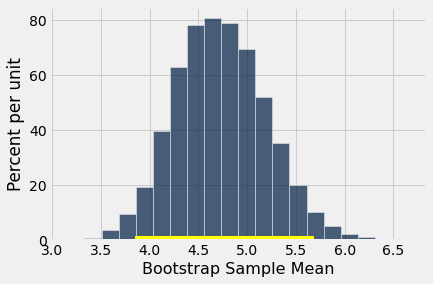

In [23]:
### 답안을 작성하시오.
resampled_mean = Table().with_column(
    'Bootstrap Sample Mean', bstrap_mean
)
resampled_mean.hist(bins=20)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);

## 다음 문제6부터 문제10을 위해 주사위 눈의 수를 나타내는 Table 변수 ``model``를 이용하자.

In [0]:
values = make_array(1,2,3,4,5,6)
model = Table().with_column('Dice', values)

### 문제6
주사위를 ``n``번 던진 후 주사위 눈의 수 *평균값*을 구하는 함수 avgdice를 작성하시오.

(위 ``model`` Table을 이용하여 sampling한다)

In [0]:
def avgdice(n):
### 답안을 작성하시오.
  a = np.random.choice(values, n)
  return np.mean(a)

In [33]:
### 지우지 마시오.
avgdice(10)

2.6

### 문제7
위 ``avgdice`` 함수를 이용하여 주사위를 10번 던진 후 주사위 눈의 평균값을 구하는 시행을 10000번 시행하여 그 값들을 ``avg_ten`` 배열 변수에 저장하시오. 

In [0]:
### 답안을 작성하시오.
avg_ten = make_array()
for i in np.arange(10000):
  b = avgdice(10)
  avg_ten = np.append(avg_ten, b)

In [39]:
### 지우지 마시오.
avg_ten

array([3.6, 3.4, 4.8, ..., 3.4, 2.8, 3.3])

### 문제8
문제 2와 마찬가지로 위 avgdice 함수를 이용하여 주사위를 **100**번 던진 후 주사위 눈의 평균값을 구하는 시행을 10000번 시행하여 그 값들을 avg_hund 배열 변수에 저장하시오. 

In [0]:
### 답안을 작성하시오.
avg_hund = make_array()
for i in np.arange(10000):
  c = avgdice(100)
  avg_hund = np.append(avg_hund, c)

In [41]:
### 지우지 마시오.
avg_hund

array([3.64, 3.84, 3.58, ..., 3.85, 3.6 , 3.53])

### 문제9
위 ``avg_ten``, ``avg_hund`` 배열을 column으로 지정하여 ``results``라는 Table을 생성하시오. 

(단, 각 column의 이름은 ``average_10``과 ``average_100``으로 정하시오.)

In [0]:
### 답안을 작성하시오.
results = Table().with_columns(
    'average_10', avg_ten,
    'average_20', avg_hund
)

In [43]:
### 지우지 마시오.
results

average_10,average_20
3.6,3.64
3.4,3.84
4.8,3.58
3.9,3.32
3.4,3.33
4.7,3.77
4.1,3.4
4.6,3.64
4,3.51
5.3,3.54


### 문제10
위 ``results`` Table의 두 column을 중첩하여 histogram을 그리시오.

(단, bins의 개수는 20개로 설정한다.)


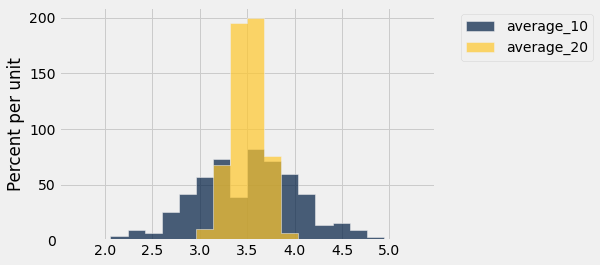

In [44]:
### 답안을 작성하시오.
results.hist(bins=20)